## Markowitz Model for Portfolio Optimization

The objective of this project is to formulate and solve the Markowitz model for portfolio optimization using Python. The Markowitz model aims to optimize the allocation of capital among a set of assets to minimize the overall risk (variance) of the portfolio for a given level of expected return. This is achieved by solving a quadratic optimization problem. In this project we'll be using the qpsolvers package to solve this optimization problem and plot the efficient frontier, which shows the trade-off between risk and return for different levels of expected returns.

### Model Description

We consider a scenario where we have some capital to invest across $n$ different assets. The goal is to determine the optimal allocation of capital to minimize the risk while achieving a specified return. 

Here is a brief description of the model:

- **Asset Allocation**: Let $x_j$ represent the fraction of total capital invested in asset $j$ for $j = 1, \ldots, n$.
- **Returns**: The annual (or daily) return of each asset is modeled as a random variable $\xi_j$.
- **Expected Returns**: The expected return of each asset is denoted by $\mu_j = E[\xi_j]$.
- **Covariance Matrix**: The covariance between returns of assets $i$ and $j$ is represented by $C_{ij} = E[(\xi_i - \mu_i)(\xi_j - \mu_j)]$.

Given these, the annual return of the portfolio is defined as the weighted sum of the expected returns: $r = \mu^T x$ where $\mu = (\mu_1, \ldots, \mu_n)$ is the vector of expected returns and $x = (x_1, \ldots, x_n)^T$ is the vector of capital allocations.


### Optimization Problem

The objective is to minimize the variance of the portfolio, which can be expressed as:

Minimize: 
* $\quad x^T C x$

Subject to: 
* $\mu^T x = r$
* $e^T x = 1, \quad \text{where } e = (1, \ldots, 1)^T$
* $x \geq 0$

### Requirements

In [24]:
import numpy as np
import random
from qpsolvers import solve_qp
import matplotlib.pyplot as plt

### Setup

For the setup, we will first input the last 2 digits of my registration number into `dig1` and `dig2` and use them to calculate `dummyrepetitions` which is a value used to initialize the random number generator state, ensuring that the random numbers generated later are reproducible. We'll set `n` equal to 10 as that is the number of different assets considered in the optimization problem. Then we can loop through the `dummyrepetitions` which in this case is 19 and generate a number either 0 or 1 in each iteration. This step initializes the random number generator state to ensure that the subsequent random number generations are influenced by these initializations, contributing to the randomness in the generated data.


In [25]:
# registation number
dig1 = 1
dig2 = 9
dummyrepetitions = 10 * dig1 + dig2

# parameters
n = 10

In [26]:
# generate data
for _ in range(dummyrepetitions):
    dummy = random.uniform(0, 1)

For the correlation matrix, we'll initialize an `n` by `n` matrix (10 x 10 in this case) filled with zeroes and then use the correlation formula to fill the matrix where the correlation between assets decreases with the distances between their indices.

In [27]:
# create correlation matrix
Corr = np.array([[0] * n for _ in range(n)], dtype=float)
print(Corr)

for i in range(n):
    for j in range(n):
        Corr[i][j] = (-1) ** abs(i - j) / (abs(i - j) + 1)
print(Corr)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[ 1.         -0.5         0.33333333 -0.25        0.2        -0.16666667
   0.14285714 -0.125       0.11111111 -0.1       ]
 [-0.5         1.         -0.5         0.33333333 -0.25        0.2
  -0.16666667  0.14285714 -0.125       0.11111111]
 [ 0.33333333 -0.5         1.         -0.5         0.33333333 -0.25
   0.2        -0.16666667  0.14285714 -0.125     ]
 [-0.25        0.33333333 -0.5         1.         -0.5         0.33333333
  -0.25        0.2        -0.16666667  0.14285714]
 [ 0.2        -0.25        0.33333333 -0.5         1.         -0.5
   0.33333333 -0.25        0.2        -0.16666667]
 [-0.16666667  0.2        -0.25        0.33333333 -0.5         1

We will initialize `ssigma` (standard deviations) and `mmu` (expected returns) as column vectors of zeroes with `n` rows. The initial values for `ssigma` and `mmu` will be 2 and 3 respectively. To populate the two vectors we'll use a loop such that each subsequent element of `ssigma` is the previous element plus a random number between 0-2 and each subsequent element of `mmu` is the previous element plus 1.

These vectors represent the standard deviations and expected returns of the 10 assets.

In [28]:
# initialize std dev and ER
ssigma = np.array([[0] * 1 for _ in range(n)], dtype = float)
mmu = np.array([[0] * 1 for _ in range(n)], dtype = float)

ssigma[0] = 2
mmu[0] = 3

print(ssigma)
print(mmu)

for i in range(n - 1):
    ssigma[i + 1] = ssigma[i] + 2 * random.uniform(0, 1)
    mmu[i + 1] = mmu[i] + 1

print(ssigma)
print(mmu)

[[2.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[3.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[ 2.        ]
 [ 3.78045464]
 [ 5.21597286]
 [ 6.49690132]
 [ 6.52130872]
 [ 6.89584569]
 [ 7.25344465]
 [ 7.31007749]
 [ 8.30920562]
 [10.06681719]]
[[ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]
 [11.]
 [12.]]


For the covariance matrix we'll do the same as before and initialize a 10x10 matrix filled with zeroes. Then we can fill the diagonal values with the values from the `ssigma` vector we created previously. To calculate the preliminary covariance matrix we'll use matrix multiplication for `ddiag`, `Corr`, and `ddiag` again. This step effectively scales the correlation matrix by the standard deviations. To ensure symmetry we can take the average of C2 and its transpose. It also helps to guarantee that the resulting matrix is positive semi-definite.

In [29]:
# create covariance matrix
ddiag = np.array([[0] * n for _ in range(n)], dtype = float)
np.fill_diagonal(ddiag, ssigma)
print(ddiag)

C2 = np.matmul(np.matmul(ddiag,Corr), ddiag)
print(C2)

C = 0.5 * (C2 + C2.T)
print(C)

[[ 2.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          3.78045464  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          5.21597286  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          6.49690132  0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          6.52130872  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          6.89584569
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   7.25344465  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          7.31007749  0.          0.        ]
 [ 0.          0.          0.          0.          0.   

The last part of the setup is to convert the `mmu` vector from a *(n , 1)* shape to a 1D array of shape *(n, )*.

In [30]:
# ER vector
print(mmu)
mu = mmu.flatten()
print(mu)

[[ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]
 [11.]
 [12.]]
[ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


### Task 1

For Task 1, the objective is to solve the Markowitz optimization problem for a range of target return values given. The goal is to find the portofolio weights that minimize the variance for each given level of expected return.

In [31]:
# define r values
r_values = np.arange(2.00, 9.25, 0.25)
print(r_values)
print(r_values.size)

[2.   2.25 2.5  2.75 3.   3.25 3.5  3.75 4.   4.25 4.5  4.75 5.   5.25
 5.5  5.75 6.   6.25 6.5  6.75 7.   7.25 7.5  7.75 8.   8.25 8.5  8.75
 9.  ]
29


Now for our function to solve the Markowitz portfolio optimization problem we'll create a function, `t1`, that takes the target return values as the input and initialize 2 empty lists for the sigmas and mus.

For the quadprog setup parameters:

* **P = C**
    * the covariance matrix C is used as the quadratic term in the objective function

* **q = np.zeros(n)**
    * a vector of zeros for the linear term in the objective function (since there is no linear term, it is zero)

* **G = -np.eye(n)**
    * a matrix to enforce the non-negativity constraints ($x \geq 0$), -np.eye(n) creates a negative identity matrix of size n

* **h = np.zeros(n)**
    * a vector of zeros corresponding to the non-negativity constraints

* **A = np.vstack([mu, np.ones(n)])**
    * a matrix to enforce the equality constraints, it combines the expected returns vector mu and a vector of ones

* **b = np.array([r, 1])**
    * a vector specifying the target return r and the sum of weights constraint (which should sum to 1)

We'll include a debugging contingency that will print out the process of solving for each target return for easier error handling. Once we have this done we can go ahead and solve the quadratic problem using quadprog within solve_qp. The output will be a vector `x` representing the portfolio weights. Once again for error handling, if `x` is 'None', we'll print out a message and continue to the next target return.

If `x` is found, we'll calculate the standard deviation and expected return of the portfolio and then append both values to the initialized list.


In [32]:
def t1(r_values):
    sigmas = []
    mus = []

    for r in r_values:
        # qp setup
        P = C
        q = np.zeros(n)
        G = -np.eye(n)
        h = np.zeros(n)
        A = np.vstack([mu, np.ones(n)])
        b = np.array([r, 1])

        # debug information
        print(f"Solving for r = {r}")
        print("P:", P)
        print("q:", q)
        print("G:", G)
        print("h:", h)
        print("A:", A)
        print("b:", b)

        # solve qp problem
        x = solve_qp(P, q, G, h, A, b, solver='quadprog')
        if x is None:
            print(f"No solution found for r = {r}")
            continue

        sigma = np.sqrt(np.dot(x.T, np.dot(C, x)))
        mu_val = np.dot(mu.T, x)

        sigmas.append(sigma)
        mus.append(mu_val)

    return sigmas, mus

# solve t1
sigmas, mus = t1(r_values)

Solving for r = 2.0
P: [[  4.          -3.78045464   3.47731524  -3.24845066   2.60852349
   -2.29861523   2.07241276  -1.82751937   1.84649014  -2.01336344]
 [ -3.78045464  14.2918373   -9.85937441   8.18708025  -6.16337796
    5.21388637  -4.57021975   3.94791663  -3.92657187   4.22857175]
 [  3.47731524  -9.85937441  27.20637292 -16.9438305   11.33832311
   -8.992136     7.56675409  -6.35486097   6.19151301  -6.56353066]
 [ -3.24845066   8.18708025 -16.9438305   42.20972678 -21.18414963
   14.93387632 -11.78122853   9.49857043  -8.99734816   9.34330256]
 [  2.60852349  -6.16337796  11.33832311 -21.18414963  42.52746745
  -22.48496931  15.76731728 -11.91781803  10.83737902 -10.94147046]
 [ -2.29861523   5.21388637  -8.992136    14.93387632 -22.48496931
   47.55268774 -25.00931749  16.80305545 -14.32474993  13.88384358]
 [  2.07241276  -4.57021975   7.56675409 -11.78122853  15.76731728
  -25.00931749  52.61245923 -26.51162123  20.090121   -18.25477531]
 [ -1.82751937   3.94791663  -6.

Now that we have our standard deviations and expected returns, we'll plot the outputs.

Each black dot represents a portfolio that has been optimized for a specific target return. The x-axis represents the standard deviation of portfolio returns and the y-axis represents the expected return of the portfolio. The gray line illustrates the efficient frontier, meaning portfolios on this line offer the best possible returns for their level of risk. The red X marks the minimum risk portfolio and the green X marks the maximum return portfolio.

We see a concave shape, typical of efficient frontiers, meaning that as the risk increases, the return increases at a decreasing rate. It's important to understand the concept of an efficient frontier as this demonstrates the best possible returns for different level of risk. Any portfolio not on this line is sub-optimal as it would offer a lower return for the same level of risk or higher risk for the same level of return.

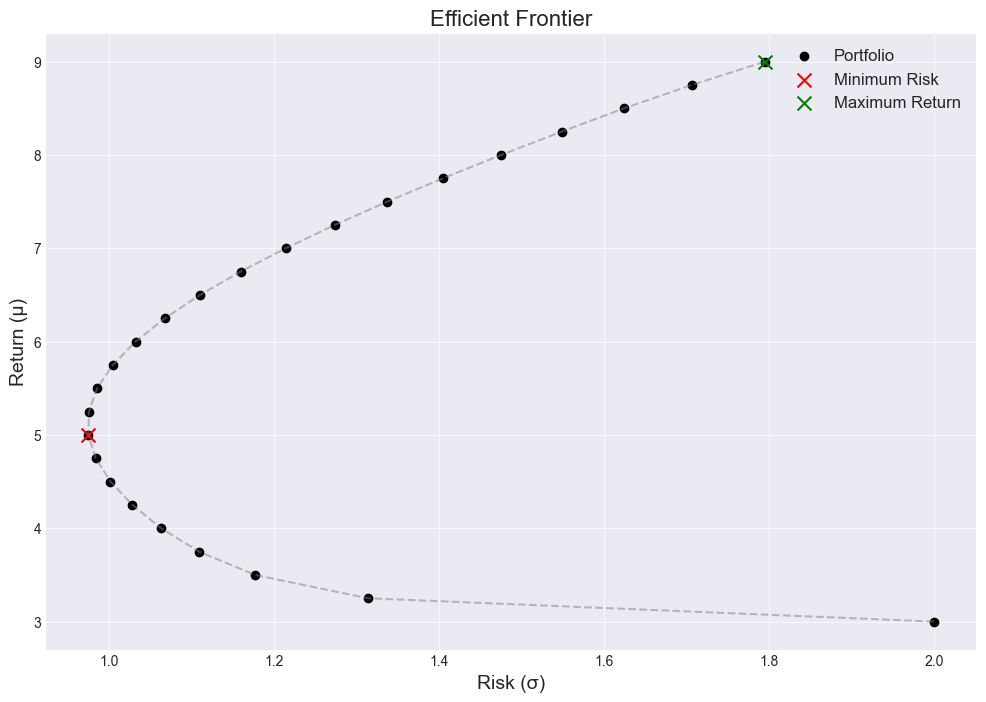

In [33]:
# plot t1 results
plt.figure(figsize=(12, 8))
plt.scatter(sigmas, mus, c='black', marker='o', label='Portfolio')
plt.plot(sigmas, mus, linestyle='--', color='gray', alpha=0.5)

min_risk_idx = np.argmin(sigmas)
max_return_idx = np.argmax(mus)
plt.scatter(sigmas[min_risk_idx], mus[min_risk_idx], c='red', marker='x', s=100, label='Minimum Risk')
plt.scatter(sigmas[max_return_idx], mus[max_return_idx], c='green', marker='x', s=100, label='Maximum Return')

plt.xlabel('Risk (σ)', fontsize=14)
plt.ylabel('Return (μ)', fontsize=14)
plt.title('Efficient Frontier', fontsize=16)
plt.grid(True, linestyle='-', alpha=0.7)
plt.legend(fontsize=12)
plt.style.use('seaborn-v0_8-darkgrid')
plt.show()


### Task 2

For Task 2, the objective is to perform the same operation as Task 1 but with the modified contraint that it is not necessary to invest the whole capital and that the not invested fraction $1 - \sum_{j} x_{j}$ of the whole capital can be saved without any return and without any "risk".

Essentially we are modifying the initial constraint from:

$e^T x = 1, \quad \text{where } e = (1, \ldots, 1)^T$ 

To:

$e^T x \leq 1, \quad \text{where } e = (1, \ldots, 1)^T$

We'll create a similar function however we'll modify the equality constraint and change it to an inequality constraint.

In [34]:
def t2(r_values):
    sigmas = []
    mus = []

    for r in r_values:
        # qp setup
        P = C
        q = np.zeros(n)
        G = -np.eye(n)
        h = np.zeros(n)
        A = np.vstack([mu, np.ones(n)])
        b = np.array([r, 1])

        # debug information
        print(f"Solving for r = {r}")
        print("P:", P)
        print("q:", q)
        print("G:", G)
        print("h:", h)
        print("A:", A)
        print("b:", b)

        # modify the constraint
        G = np.vstack([G, np.ones(n)])
        h = np.hstack([h, [1]])

        # solve qp problem
        x = solve_qp(P, q, G, h, A[:-1], b[:-1], solver='quadprog')
        if x is None:
            print(f"No solution found for r = {r}")
            continue

        sigma = np.sqrt(np.dot(x.T, np.dot(C, x)))
        mu_val = np.dot(mu.T, x)

        sigmas.append(sigma)
        mus.append(mu_val)

    return sigmas, mus

# solve t2
sigmas_2, mus_2 = t2(r_values)

Solving for r = 2.0
P: [[  4.          -3.78045464   3.47731524  -3.24845066   2.60852349
   -2.29861523   2.07241276  -1.82751937   1.84649014  -2.01336344]
 [ -3.78045464  14.2918373   -9.85937441   8.18708025  -6.16337796
    5.21388637  -4.57021975   3.94791663  -3.92657187   4.22857175]
 [  3.47731524  -9.85937441  27.20637292 -16.9438305   11.33832311
   -8.992136     7.56675409  -6.35486097   6.19151301  -6.56353066]
 [ -3.24845066   8.18708025 -16.9438305   42.20972678 -21.18414963
   14.93387632 -11.78122853   9.49857043  -8.99734816   9.34330256]
 [  2.60852349  -6.16337796  11.33832311 -21.18414963  42.52746745
  -22.48496931  15.76731728 -11.91781803  10.83737902 -10.94147046]
 [ -2.29861523   5.21388637  -8.992136    14.93387632 -22.48496931
   47.55268774 -25.00931749  16.80305545 -14.32474993  13.88384358]
 [  2.07241276  -4.57021975   7.56675409 -11.78122853  15.76731728
  -25.00931749  52.61245923 -26.51162123  20.090121   -18.25477531]
 [ -1.82751937   3.94791663  -6.

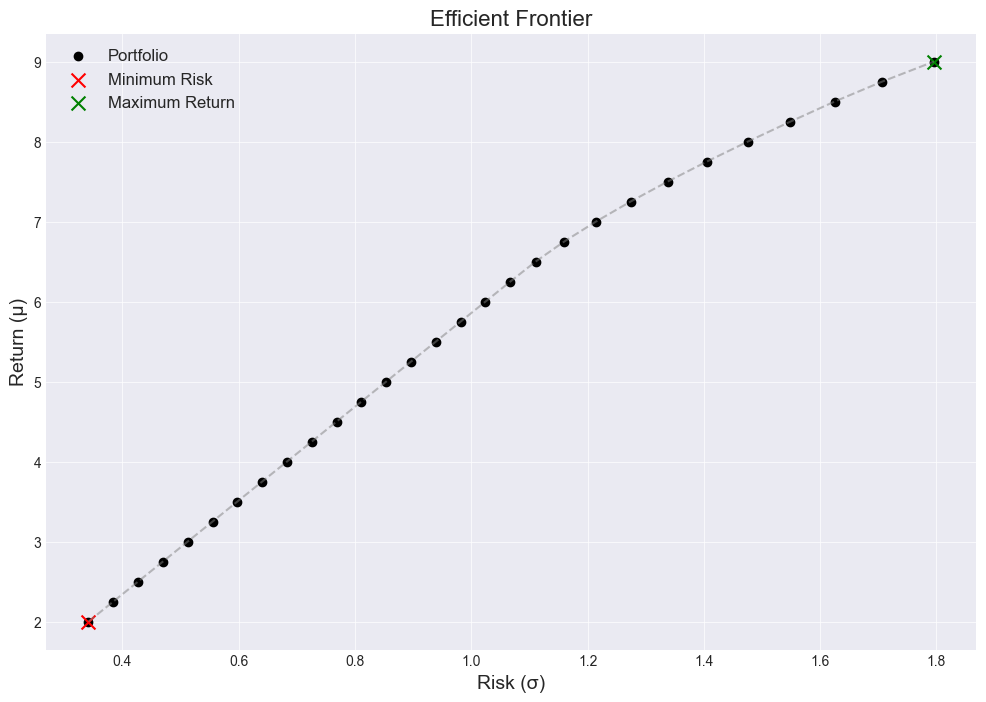

In [35]:
# plot t2 results
plt.figure(figsize=(12, 8))
plt.scatter(sigmas_2, mus_2, c='black', marker='o', label='Portfolio')
plt.plot(sigmas_2, mus_2, linestyle='--', color='gray', alpha=0.5)

min_risk_idx = np.argmin(sigmas_2)
max_return_idx = np.argmax(mus_2)
plt.scatter(sigmas_2[min_risk_idx], mus_2[min_risk_idx], c='red', marker='x', s=100, label='Minimum Risk')
plt.scatter(sigmas_2[max_return_idx], mus_2[max_return_idx], c='green', marker='x', s=100, label='Maximum Return')

plt.xlabel('Risk (σ)', fontsize=14)
plt.ylabel('Return (μ)', fontsize=14)
plt.title('Efficient Frontier', fontsize=16)
plt.grid(True, linestyle='-', alpha=0.7)
plt.legend(fontsize=12)
plt.style.use('seaborn-v0_8-darkgrid')
plt.show()

A couple of things to note from the partial investment portfolio: 

- The shape is different. The curve is more linear and less steep at lower levels of risk. This indicates that the full investment contraint in Task 1 leads to more pronounced trade-offs between risk and return.

- The risk levels in Task 2 are generally lower for the same return levels compared to Task 1. This is due to the partial investment constraint.

- The return levels in Task 2 can start from a lower base because part of the capital can be held without return.

### Task 3

For Task 3, we'll repeat the same process from Task 1, however this time we'll change the following constraint:

$\mu^T x = r$

to:

$\mu^T x \geq r$

This change means that the optimization problem will allow for portfolios that have a higher expected return than the target return. This additional flexibility can result in portfolios with lower risk for a given target return as it opens up more possible combinations of asset allocations.

In [36]:
def t3(r_values):
    sigmas = []
    mus = []

    for r in r_values:
        # qp setup
        P = C
        q = np.zeros(n)
        G = -np.eye(n)
        h = np.zeros(n)
        A = mu.reshape(1, -1)
        b = np.array([r])

        # change equality constraint to inequality constraint
        G = np.vstack([G, -mu])
        h = np.hstack([h, -r])

        # solve qp problem
        x = solve_qp(P, q, G, h, A, b, solver='quadprog')
        if x is None:
            print(f"No solution found for r = {r}")
            continue

        sigma = np.sqrt(np.dot(x.T, np.dot(C, x)))
        mu_val = np.dot(mu.T, x)

        sigmas.append(sigma)
        mus.append(mu_val)

    return sigmas, mus

# solve t3
sigmas_3, mus_3 = t3(r_values)

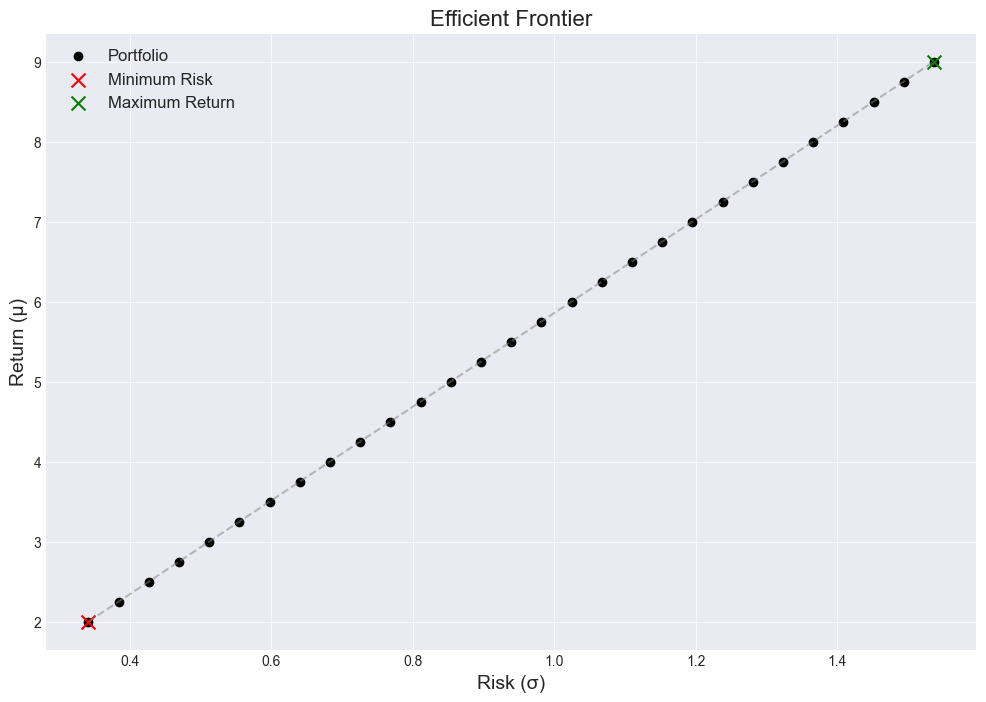

In [37]:
# plot t3 results
plt.figure(figsize=(12, 8))
plt.scatter(sigmas_3, mus_3, c='black', marker='o', label='Portfolio')
plt.plot(sigmas_3, mus_3, linestyle='--', color='gray', alpha=0.5)

min_risk_idx = np.argmin(sigmas_3)
max_return_idx = np.argmax(mus_3)
plt.scatter(sigmas_3[min_risk_idx], mus_3[min_risk_idx], c='red', marker='x', s=100, label='Minimum Risk')
plt.scatter(sigmas_3[max_return_idx], mus_3[max_return_idx], c='green', marker='x', s=100, label='Maximum Return')

plt.xlabel('Risk (σ)', fontsize=14)
plt.ylabel('Return (μ)', fontsize=14)
plt.title('Efficient Frontier', fontsize=16)
plt.grid(True, linestyle='-', alpha=0.7)
plt.legend(fontsize=12)
plt.style.use('seaborn-v0_8-darkgrid')
plt.show()

Looking at the results from task 3, we clearly see a linear and smooth efficient frontier, indicating a consistent trade-off between risk and return. The solver was unable to find solutions for 7.25, 8.75, and 9, indicating these return levels are not achievable with the available assets and their expected returns under the given constraints.

### Task 4

For Task 4, we'll repeat the same process from Task 1, however we will allow for short selling. Short selling can be modeled by simply removing the $x \geq 0$ constraint. Removing this constraint allows for negative weights in the portfolio.

In [38]:
def t4(r_values):
    sigmas = []
    mus = []

    for r in r_values:
        # qp setup
        P = C
        q = np.zeros(n)
        A = np.vstack([mu, np.ones(n)])
        b = np.array([r, 1])

        # remove non-negativity constraint
        G = None
        h = None

        # solve qp problem
        x = solve_qp(P, q, G, h, A, b, solver='quadprog')
        if x is None:
            print(f"No solution found for r = {r}")
            continue

        sigma = np.sqrt(np.dot(x.T, np.dot(C, x)))
        mu_val = np.dot(mu.T, x)

        sigmas.append(sigma)
        mus.append(mu_val)

    return sigmas, mus

# solve t4
sigmas_4, mus_4 = t4(r_values)

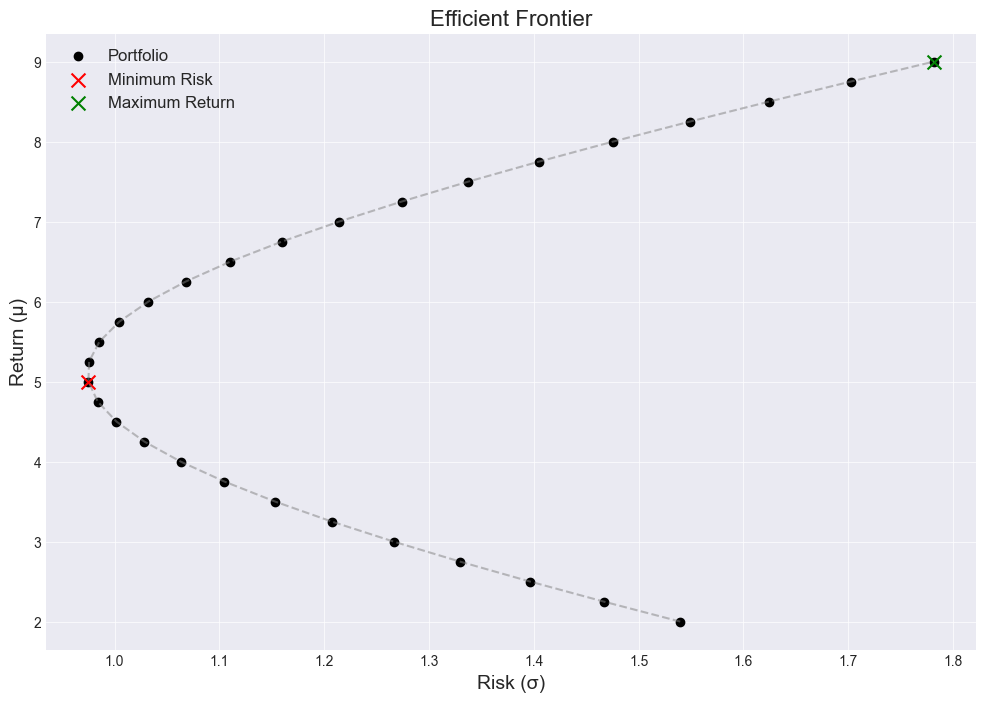

In [39]:
# plot t4 results
plt.figure(figsize=(12, 8))
plt.scatter(sigmas_4, mus_4, c='black', marker='o', label='Portfolio')
plt.plot(sigmas_4, mus_4, linestyle='--', color='gray', alpha=0.5)

min_risk_idx = np.argmin(sigmas_4)
max_return_idx = np.argmax(mus_4)
plt.scatter(sigmas_4[min_risk_idx], mus_4[min_risk_idx], c='red', marker='x', s=100, label='Minimum Risk')
plt.scatter(sigmas_4[max_return_idx], mus_4[max_return_idx], c='green', marker='x', s=100, label='Maximum Return')

plt.xlabel('Risk (σ)', fontsize=14)
plt.ylabel('Return (μ)', fontsize=14)
plt.title('Efficient Frontier', fontsize=16)
plt.grid(True, linestyle='-', alpha=0.7)
plt.legend(fontsize=12)
plt.style.use('seaborn-v0_8-darkgrid')
plt.show()

Comparing the t4 plot to the t1 plot, it is broader and more extended due to the flexibility introduced by allowing short selling. Short selling enables portfolios to exploit opportunities from declining asset prices, resulting in a more favorable risk-return profile.